<h1>국내 여행 로그 데이터(서부권) (2023)</h1>

<hr>
<h2>[패키지 및 데이터 로드]</h2>

In [1]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 출력 설정 변경 (None : 모든 행,열 출력)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#pd.reset_option('all') # 설정 변경 초기화 

In [2]:
# 분석용 데이터 불러오기
raw_traveller_master = pd.read_csv('data/validation/original_data/여행객.csv', encoding='UTF-8')
raw_companion_info = pd.read_csv('data/validation/original_data/동반자정보.csv', encoding='UTF-8')
raw_travel = pd.read_csv('data/validation/original_data/여행.csv', encoding='UTF-8')
raw_mvmn_consume = pd.read_csv('data/validation/original_data/이동수단소비내역.csv', encoding='UTF-8')
raw_lodge_consume = pd.read_csv('data/validation/original_data/숙박소비내역.csv', encoding='UTF-8')
raw_activity = pd.read_csv('data/validation/original_data/활동내역.csv', encoding='UTF-8')
raw_activity_consume = pd.read_csv('data/validation/original_data/활동소비내역.csv', encoding='UTF-8')
raw_adv_consume = pd.read_csv('data/validation/original_data/사전소비내역.csv', encoding='UTF-8')

# 복사본 만들기 
traveller_master = raw_traveller_master.copy()
companion_info = raw_companion_info.copy()
travel = raw_travel.copy()
mvmn_consume = raw_mvmn_consume.copy()
lodge_consume = raw_lodge_consume.copy()
activity = raw_activity.copy()
activity_consume = raw_activity_consume.copy()
adv_consume = raw_adv_consume.copy()

<hr>
<h2>[여행객.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [3]:
# 필요한 변수 리스트
columns_to_keep_traveller = [
    'TRAVELER_ID', 'GENDER', 'AGE_GRP', 'JOB_NM', 'TRAVEL_TERM', 'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SGG_2', 'TRAVEL_LIKE_SGG_3', 
    'TRAVEL_STYL_1','TRAVEL_STYL_2','TRAVEL_STYL_3','TRAVEL_STYL_4','TRAVEL_STYL_5', 'TRAVEL_STYL_6', 'TRAVEL_STYL_7', 'TRAVEL_STYL_8',
    'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION', 'TRAVEL_STATUS_ACCOMPANY', 'TRAVEL_MOTIVE_1', 'TRAVEL_COMPANIONS_NUM'
    ]

# traveller_master에 필요한 변수만 남기고 저장
traveller_master = traveller_master[columns_to_keep_traveller]

# 변수명 변경
traveller_master = traveller_master.rename(columns={'TRAVEL_MOTIVE_1' : 'TRAVEL_MOTIVE'})

# 결과 확인
print(traveller_master.head())

  TRAVELER_ID GENDER  AGE_GRP  JOB_NM  TRAVEL_TERM  TRAVEL_LIKE_SGG_1  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SGG_3  TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  TRAVEL_STYL_7  TRAVEL_STYL_8 TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY  TRAVEL_MOTIVE  TRAVEL_COMPANIONS_NUM
0     g005903      남       30       5            2              42210              44825              41270              1              1              2              1              1              7              7              7                     경기도                        충남                자녀 동반 여행              2                      4
1     g011387      여       20      13            2              50130              26350              30140              3              6              6              2              2              5              6              5                    충청남도                        대전             2인 여행(가족 외)              1    

In [4]:
# 데이터의 행, 열 개수 출력
print('여행객.csv의 행, 열 개수 : ')
print(traveller_master.shape)

여행객.csv의 행, 열 개수 : 
(320, 21)


In [5]:
# 데이터의 구조와 타입 확인
print('여행객.csv의 구조와 타입 : ')
print(traveller_master.info())

여행객.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   TRAVELER_ID                320 non-null    object
 1   GENDER                     320 non-null    object
 2   AGE_GRP                    320 non-null    int64 
 3   JOB_NM                     320 non-null    int64 
 4   TRAVEL_TERM                320 non-null    int64 
 5   TRAVEL_LIKE_SGG_1          320 non-null    int64 
 6   TRAVEL_LIKE_SGG_2          320 non-null    int64 
 7   TRAVEL_LIKE_SGG_3          320 non-null    int64 
 8   TRAVEL_STYL_1              320 non-null    int64 
 9   TRAVEL_STYL_2              320 non-null    int64 
 10  TRAVEL_STYL_3              320 non-null    int64 
 11  TRAVEL_STYL_4              320 non-null    int64 
 12  TRAVEL_STYL_5              320 non-null    int64 
 13  TRAVEL_STYL_6              320 non-null    int

In [6]:
# 데이터의 결측치 확인
print('여행객.csv의 결측치 : ')
print(traveller_master.isnull().sum())

여행객.csv의 결측치 : 
TRAVELER_ID                  0
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
dtype: int64


In [7]:
# 데이터 살펴보기
traveller_master.head()

,TRAVELER_ID,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM
0,g005903,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4
1,g011387,여,20,13,2,50130,26350,30140,3,6,6,2,2,5,6,5,충청남도,대전,2인 여행(가족 외),1,1
2,g003709,여,30,2,2,42810,26710,46130,4,5,3,2,5,3,5,6,인천광역시,대전,3대 동반 여행(친척 포함),7,2
3,g002674,남,40,8,2,42210,46710,43800,1,7,1,7,1,1,1,6,경상남도,광주,2인 여행(가족 외),6,1
4,g013104,남,30,3,2,46710,45110,50110,2,6,2,2,1,3,1,2,광주광역시,전남,나홀로 여행,1,0


<h3>2. 전처리</h3>

<h5>1) 모든 CSV 파일 통합을 위해 TRAVELER_ID를 TRAVEL_ID 형식으로 변환</h5>

In [8]:
# TRAVELER_ID의 가장 앞의 알파벳과 _를 추출하여 TRAVELER_ID에 결합하기 위한 함수
def modify_travel_id(travel_id):
    match = re.match(r'([a-zA-Z])(\d+)', travel_id)
    if match:
        return f'{match.group(1)}_{match.group(0)}'
    return travel_id

# TRAVELER_ID 변환
traveller_master['TRAVEL_ID'] = traveller_master['TRAVELER_ID'].apply(modify_travel_id)

# 변환 결과 확인
traveller_master[['TRAVELER_ID', 'TRAVEL_ID']].head()

,TRAVELER_ID,TRAVEL_ID
0,g005903,g_g005903
1,g011387,g_g011387
2,g003709,g_g003709
3,g002674,g_g002674
4,g013104,g_g013104


In [9]:
# TRAVELER_ID 컬럼 삭제
traveller_master.drop(columns=['TRAVELER_ID'], inplace=True)

# 결과 확인
traveller_master.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID
0,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903
1,여,20,13,2,50130,26350,30140,3,6,6,2,2,5,6,5,충청남도,대전,2인 여행(가족 외),1,1,g_g011387
2,여,30,2,2,42810,26710,46130,4,5,3,2,5,3,5,6,인천광역시,대전,3대 동반 여행(친척 포함),7,2,g_g003709
3,남,40,8,2,42210,46710,43800,1,7,1,7,1,1,1,6,경상남도,광주,2인 여행(가족 외),6,1,g_g002674
4,남,30,3,2,46710,45110,50110,2,6,2,2,1,3,1,2,광주광역시,전남,나홀로 여행,1,0,g_g013104


<h3>3. 전처리 후 확인</h3>

In [10]:
# TRAVEL_ID 중복 여부 확인
duplicates = traveller_master[traveller_master.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
    print(duplicates)
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [11]:
# 데이터의 구조와 타입 확인
print('여행객.csv의 구조와 타입 : ')
print(traveller_master.info())

여행객.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   GENDER                     320 non-null    object
 1   AGE_GRP                    320 non-null    int64 
 2   JOB_NM                     320 non-null    int64 
 3   TRAVEL_TERM                320 non-null    int64 
 4   TRAVEL_LIKE_SGG_1          320 non-null    int64 
 5   TRAVEL_LIKE_SGG_2          320 non-null    int64 
 6   TRAVEL_LIKE_SGG_3          320 non-null    int64 
 7   TRAVEL_STYL_1              320 non-null    int64 
 8   TRAVEL_STYL_2              320 non-null    int64 
 9   TRAVEL_STYL_3              320 non-null    int64 
 10  TRAVEL_STYL_4              320 non-null    int64 
 11  TRAVEL_STYL_5              320 non-null    int64 
 12  TRAVEL_STYL_6              320 non-null    int64 
 13  TRAVEL_STYL_7              320 non-null    int

In [12]:
# 데이터의 결측치 확인
print('여행객.csv의 결측치 : ')
print(traveller_master.isnull().sum())

여행객.csv의 결측치 : 
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
dtype: int64


In [13]:
# 데이터 살펴보기
traveller_master.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID
0,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903
1,여,20,13,2,50130,26350,30140,3,6,6,2,2,5,6,5,충청남도,대전,2인 여행(가족 외),1,1,g_g011387
2,여,30,2,2,42810,26710,46130,4,5,3,2,5,3,5,6,인천광역시,대전,3대 동반 여행(친척 포함),7,2,g_g003709
3,남,40,8,2,42210,46710,43800,1,7,1,7,1,1,1,6,경상남도,광주,2인 여행(가족 외),6,1,g_g002674
4,남,30,3,2,46710,45110,50110,2,6,2,2,1,3,1,2,광주광역시,전남,나홀로 여행,1,0,g_g013104


<hr>
<h2>[동반자정보.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [14]:
# 필요한 변수 리스트
columns_to_keep_companion = [
    'TRAVEL_ID', 'REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP'
    ]

# companion_info에 필요한 변수만 남기고 저장
companion_info_grouped = companion_info[columns_to_keep_companion]

# 결과 확인
print(companion_info_grouped.head())

   TRAVEL_ID  REL_CD  COMPANION_GENDER  COMPANION_AGE_GRP
0  e_e000821       1                 2                  4
1  e_e000821       7                 2                  4
2  e_e000821       7                 2                  4
3  e_e000821       7                 2                  4
4  e_e000821       7                 2                  4


In [15]:
# 데이터의 행, 열 개수 출력
print('동반자정보.csv의 행, 열 개수 : ')
print(companion_info.shape)

동반자정보.csv의 행, 열 개수 : 
(464, 6)


In [16]:
# 데이터의 구조와 타입 확인
print('동반자정보.csv의 구조와 타입 : ')
print(companion_info.info())

동반자정보.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   COMPANION_SEQ        464 non-null    int64 
 1   TRAVEL_ID            464 non-null    object
 2   REL_CD               464 non-null    int64 
 3   COMPANION_GENDER     464 non-null    int64 
 4   COMPANION_AGE_GRP    464 non-null    int64 
 5   COMPANION_SITUATION  464 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 21.9+ KB
None


In [17]:
# 데이터의 결측치 확인
print('동반자정보.csv의 결측치 : ')
print(companion_info.isnull().sum())

동반자정보.csv의 결측치 : 
COMPANION_SEQ          0
TRAVEL_ID              0
REL_CD                 0
COMPANION_GENDER       0
COMPANION_AGE_GRP      0
COMPANION_SITUATION    0
dtype: int64


In [18]:
# 데이터 살펴보기
companion_info.head()

,COMPANION_SEQ,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,COMPANION_SITUATION
0,1,e_e000821,1,2,4,1
1,3,e_e000821,7,2,4,1
2,5,e_e000821,7,2,4,1
3,2,e_e000821,7,2,4,1
4,4,e_e000821,7,2,4,1


<h5>4) TRAVEL_ID 별로 리스트로 결합</h5>

In [19]:
# # REL_CD, COMPANION_GENDER, COMPANION_AGE_GRP를 TRAVEL_ID별로 리스트로 결합
# companion_info_grouped = companion_info.groupby('TRAVEL_ID').agg({
#     'REL_CD': lambda x: list(x),
#     'COMPANION_GENDER': lambda x: list(x),
#     'COMPANION_AGE_GRP': lambda x: list(x),
# }).reset_index()

# # 결과 확인
# print(companion_info_grouped.head())

<h3>3. 전처리 후 확인</h3>

In [20]:
# TRAVEL_ID 중복 여부 확인
duplicates = companion_info_grouped[companion_info_grouped.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
    print(duplicates)
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.
     TRAVEL_ID  REL_CD  COMPANION_GENDER  COMPANION_AGE_GRP
0    e_e000821       1                 2                  4
1    e_e000821       7                 2                  4
2    e_e000821       7                 2                  4
3    e_e000821       7                 2                  4
4    e_e000821       7                 2                  4
..         ...     ...               ...                ...
452  g_g012625       2                 1                  1
453  g_g012629       2                 2                  1
454  g_g012629       1                 1                  5
459  g_g012762       1                 2                  4
460  g_g012762       2                 1                  1

[292 rows x 4 columns]


In [21]:
# 데이터의 구조와 타입 확인
print('동반자정보.csv의 구조와 타입 : ')
print(companion_info_grouped.info())

동반자정보.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TRAVEL_ID          464 non-null    object
 1   REL_CD             464 non-null    int64 
 2   COMPANION_GENDER   464 non-null    int64 
 3   COMPANION_AGE_GRP  464 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.6+ KB
None


In [22]:
# 데이터의 결측치 확인
print('동반자정보.csv의 결측치 : ')
print(companion_info_grouped.isnull().sum())

동반자정보.csv의 결측치 : 
TRAVEL_ID            0
REL_CD               0
COMPANION_GENDER     0
COMPANION_AGE_GRP    0
dtype: int64


In [23]:
# 데이터 살펴보기
companion_info_grouped.head()

,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP
0,e_e000821,1,2,4
1,e_e000821,7,2,4
2,e_e000821,7,2,4
3,e_e000821,7,2,4
4,e_e000821,7,2,4


<hr>
<h2>[여행.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [24]:
# 필요한 변수 리스트
columns_to_keep_travel = [
    'TRAVEL_ID', 'TRAVEL_PURPOSE', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'TRAVEL_MISSION_CHECK'
    ]

# travel에 필요한 변수만 남기고 저장
travel = travel[columns_to_keep_travel]

# 결과 확인
print(travel.head())

   TRAVEL_ID TRAVEL_PURPOSE TRAVEL_START_YMD TRAVEL_END_YMD TRAVEL_MISSION_CHECK
0  e_e000821     1;2;21;4;8       2023-05-27     2023-05-29              21;4;22
1  e_e013141              4       2023-09-24     2023-09-25                1;4;2
2  e_e013180        2;4;6;4       2023-09-23     2023-09-24               2;6;26
3  e_e013191   2;21;22;26;3       2023-09-23     2023-09-24              5;27;28
4  f_f005447  10;12;13;21;3       2023-08-09     2023-08-11              3;10;13


In [25]:
# 데이터의 행, 열 개수 출력
print('여행.csv의 행, 열 개수 : ')
print(travel.shape)

여행.csv의 행, 열 개수 : 
(320, 5)


In [26]:
# 데이터의 구조와 타입 확인
print('여행.csv의 구조와 타입 : ')
print(travel.info())

여행.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             320 non-null    object
 1   TRAVEL_PURPOSE        320 non-null    object
 2   TRAVEL_START_YMD      320 non-null    object
 3   TRAVEL_END_YMD        320 non-null    object
 4   TRAVEL_MISSION_CHECK  320 non-null    object
dtypes: object(5)
memory usage: 12.6+ KB
None


In [27]:
# 데이터의 결측치 확인
print('여행.csv의 결측치 : ')
print(travel.isnull().sum())

여행.csv의 결측치 : 
TRAVEL_ID               0
TRAVEL_PURPOSE          0
TRAVEL_START_YMD        0
TRAVEL_END_YMD          0
TRAVEL_MISSION_CHECK    0
dtype: int64


In [28]:
# 데이터 살펴보기
travel.head()

,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK
0,e_e000821,1;2;21;4;8,2023-05-27,2023-05-29,21;4;22
1,e_e013141,4,2023-09-24,2023-09-25,1;4;2
2,e_e013180,2;4;6;4,2023-09-23,2023-09-24,2;6;26
3,e_e013191,2;21;22;26;3,2023-09-23,2023-09-24,5;27;28
4,f_f005447,10;12;13;21;3,2023-08-09,2023-08-11,3;10;13


<h3>2. 전처리</h3>

<h3>3. 전처리 후 확인</h3>

In [29]:
# TRAVEL_ID 중복 여부 확인
duplicates = travel[travel.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
    print(duplicates)
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [30]:
# 데이터의 구조와 타입 확인
print('여행.csv의 구조와 타입 : ')
print(travel.info())

여행.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TRAVEL_ID             320 non-null    object
 1   TRAVEL_PURPOSE        320 non-null    object
 2   TRAVEL_START_YMD      320 non-null    object
 3   TRAVEL_END_YMD        320 non-null    object
 4   TRAVEL_MISSION_CHECK  320 non-null    object
dtypes: object(5)
memory usage: 12.6+ KB
None


In [31]:
# 데이터의 결측치 확인
print('여행.csv의 결측치 : ')
print(travel.isnull().sum())

여행.csv의 결측치 : 
TRAVEL_ID               0
TRAVEL_PURPOSE          0
TRAVEL_START_YMD        0
TRAVEL_END_YMD          0
TRAVEL_MISSION_CHECK    0
dtype: int64


In [32]:
# 데이터 살펴보기
travel.head()

,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK
0,e_e000821,1;2;21;4;8,2023-05-27,2023-05-29,21;4;22
1,e_e013141,4,2023-09-24,2023-09-25,1;4;2
2,e_e013180,2;4;6;4,2023-09-23,2023-09-24,2;6;26
3,e_e013191,2;21;22;26;3,2023-09-23,2023-09-24,5;27;28
4,f_f005447,10;12;13;21;3,2023-08-09,2023-08-11,3;10;13


<hr>
<h2>[이동수단소비내역.csv]</h2>

In [33]:
# 필요한 변수 리스트
columns_to_keep_mvmn_consume = [
    'TRAVEL_ID', 'MVMN_SE_NM', 'PAYMENT_AMT_WON'
    ]

# mvmn_consume에 필요한 변수만 남기고 저장
mvmn_consume = mvmn_consume[columns_to_keep_mvmn_consume]

# 결과 확인
print(mvmn_consume.head())

   TRAVEL_ID MVMN_SE_NM  PAYMENT_AMT_WON
0  g_g004813         택시             3000
1  g_g008723        지하철             3000
2  g_g003478         택시             4500
3  g_g007188         택시             6000
4  g_g007207        지하철             7000


<h3>1. 변수 추출 및 검토</h3>

In [34]:
# 데이터의 행, 열 개수 출력
print('이동수단소비내역.csv의 행, 열 개수 : ')
print(mvmn_consume.shape)

이동수단소비내역.csv의 행, 열 개수 : 
(683, 3)


In [35]:
# 데이터의 구조와 타입 확인
print('이동수단소비내역.csv의 구조와 타입 : ')
print(mvmn_consume.info())

이동수단소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        683 non-null    object
 1   MVMN_SE_NM       683 non-null    object
 2   PAYMENT_AMT_WON  683 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.1+ KB
None


In [36]:
# 데이터의 결측치 확인
print('이동수단소비내역.csv의 결측치 : ')
print(mvmn_consume.isnull().sum())

이동수단소비내역.csv의 결측치 : 
TRAVEL_ID          0
MVMN_SE_NM         0
PAYMENT_AMT_WON    0
dtype: int64


In [37]:
# 데이터 살펴보기
mvmn_consume.head()

,TRAVEL_ID,MVMN_SE_NM,PAYMENT_AMT_WON
0,g_g004813,택시,3000
1,g_g008723,지하철,3000
2,g_g003478,택시,4500
3,g_g007188,택시,6000
4,g_g007207,지하철,7000


<h3>2. 전처리</h3>

<h5>1) 이동수단 소비내역인 걸 나타내기 위해서 변수명 변경

In [38]:
mvmn_consume = mvmn_consume.rename(columns = {'PAYMENT_AMT_WON' : 'MVMN_WON'})

# 결과 확인
mvmn_consume.head()

,TRAVEL_ID,MVMN_SE_NM,MVMN_WON
0,g_g004813,택시,3000
1,g_g008723,지하철,3000
2,g_g003478,택시,4500
3,g_g007188,택시,6000
4,g_g007207,지하철,7000


<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 주요이동수단 구하기

In [39]:
# # TRAVEL_ID별로 이동수단 빈도 계산
# mvmn_consume_count = mvmn_consume.groupby(['TRAVEL_ID', 'MVMN_SE_NM']).size().reset_index(name='COUNT')

# # TRAVEL_ID별로 가장 많이 사용된 이동수단 추출
# mvmn_consume_major_transport = mvmn_consume_count.groupby('TRAVEL_ID').apply(
#     lambda x: x[x['COUNT'] == x['COUNT'].max()]['MVMN_SE_NM'].tolist()  # 빈도수가 동일한 이동수단을 리스트로 결합
# ).reset_index(name='MAJOR_TRANSPORT')

# # 결과 확인
# print(mvmn_consume_major_transport.head())

<h5>3) TRAVEL_ID가 중복되는 경우 이동수단 소비내역 전처리 - pivot_table

In [40]:
# TRAVEL_ID 중복 여부 확인
duplicates = mvmn_consume[mvmn_consume.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


pivot_table 형식으로 변환하여, 이후 파생변수 추가 등 추가적인 분석을 쉽게 할 수 있도록 함

In [41]:
# MVMN_SE_NM을 문자열 형식으로 변환
mvmn_consume['MVMN_SE_NM'] = mvmn_consume['MVMN_SE_NM'].astype(str)

# pivot_table 생성
mvmn_consume_pivot = mvmn_consume.pivot_table(
    index='TRAVEL_ID', 
    columns='MVMN_SE_NM', 
    values='MVMN_WON', 
    aggfunc='sum', 
    fill_value=0  # 결측값은 0으로
)

# 결과 확인
print(mvmn_consume_pivot.head())

MVMN_SE_NM  KTX/SRT(고속열차)  관광버스  기타  렌터카(승용/승합/버스 등등)  배/선박  버스 + 지하철  새마을/무궁화열차  시내/마을버스  시외/고속버스  자가용(승용/승합/트럭 등등)  자전거  지하철  캠핑카(자차 및 렌탈)     택시  항공기
TRAVEL_ID                                                                                                                                               
e_e000821               0     0   0                 0     0         0          0        0        0             50000    0    0             0      0    0
e_e013180               0     0   0                 0     0         0          0        0        0             54600    0    0             0      0    0
e_e013191               0     0   0                 0     0     23600          0        0    20100                 0    0    0             0  11200    0
f_f005447               0     0   0                 0     0         0          0        0        0             41000    0    0             0      0    0
g_g000011               0     0   0                 0     0         0          0  

2)에서 구했던 주요이동수단과 병합하여 mvmn_consume_new 데이터프레임 생성

In [42]:
# # 주요 이동수단과 피벗 테이블 병합
# mvmn_consume_new_pivot = pd.merge(
#     mvmn_consume_pivot.reset_index(),  # 피벗 테이블을 병합하기 위해 인덱스를 초기화
#     mvmn_consume_major_transport,     # 주요 이동수단 데이터프레임
#     on='TRAVEL_ID',                   # 공통 키: TRAVEL_ID
#     how='left'                        # 병합 방식: 왼쪽 (피벗 테이블 기준)
# )

# # 결과 확인
# print(mvmn_consume_new_pivot.head())

<h5>4) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 이동수단총소비액 파생변수 추가

In [43]:
# TRAVEL_ID별로 이동수단의 총 소비액 계산
mvmn_consume_total = mvmn_consume.groupby('TRAVEL_ID')['MVMN_WON'].sum().reset_index(name='TOTAL_MVMN_WON')

# mvmn_consume_new_pivot 병합
mvmn_consume_new_pivot = mvmn_consume_pivot.merge(mvmn_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(mvmn_consume_new_pivot.head())

   TRAVEL_ID  KTX/SRT(고속열차)  관광버스  기타  렌터카(승용/승합/버스 등등)  배/선박  버스 + 지하철  새마을/무궁화열차  시내/마을버스  시외/고속버스  자가용(승용/승합/트럭 등등)  자전거  지하철  캠핑카(자차 및 렌탈)     택시  항공기  TOTAL_MVMN_WON
0  e_e000821              0     0   0                 0     0         0          0        0        0             50000    0    0             0      0    0           50000
1  e_e013180              0     0   0                 0     0         0          0        0        0             54600    0    0             0      0    0           54600
2  e_e013191              0     0   0                 0     0     23600          0        0    20100                 0    0    0             0  11200    0           54900
3  f_f005447              0     0   0                 0     0         0          0        0        0             41000    0    0             0      0    0           41000
4  g_g000011              0     0   0                 0     0         0          0        0        0            144330    0    0             0   

merge 후 결과의 가독성을 높이기 위해 TRAVEL_ID, MAJOR_TRANSPORT, TOTAL_MVMN_WON 만 추출

In [44]:
mvmn_consume_new = mvmn_consume_new_pivot[['TRAVEL_ID',  'TOTAL_MVMN_WON']]
print(mvmn_consume_new)

     TRAVEL_ID  TOTAL_MVMN_WON
0    e_e000821           50000
1    e_e013180           54600
2    e_e013191           54900
3    f_f005447           41000
4    g_g000011          144330
..         ...             ...
293  g_g012863            2400
294  g_g012870           29000
295  g_g012889           72714
296  g_g013064           71200
297  g_g013104           10000

[298 rows x 2 columns]


<h3>3. 전처리 후 확인</h3>

In [45]:
# TRAVEL_ID 중복 여부 확인
duplicates = mvmn_consume_new[mvmn_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [46]:
# 데이터의 구조와 타입 확인
print('이동수단소비내역.csv의 구조와 타입 : ')
print(mvmn_consume_new.info())

이동수단소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TRAVEL_ID       298 non-null    object
 1   TOTAL_MVMN_WON  298 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ KB
None


In [47]:
# 데이터의 결측치 확인
print('이동수단소비내역.csv의 결측치 : ')
print(mvmn_consume_new.isnull().sum())

이동수단소비내역.csv의 결측치 : 
TRAVEL_ID         0
TOTAL_MVMN_WON    0
dtype: int64


In [48]:
# 데이터 살펴보기
mvmn_consume_new.head()

,TRAVEL_ID,TOTAL_MVMN_WON
0,e_e000821,50000
1,e_e013180,54600
2,e_e013191,54900
3,f_f005447,41000
4,g_g000011,144330


<hr>
<h2>[숙박소비내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [49]:
# 필요한 변수 리스트
columns_to_keep_lodge_consume = [
    'TRAVEL_ID', 'LODGING_TYPE_CD', 'PAYMENT_AMT_WON'
    ]

# lodge_consume.shape에 필요한 변수만 남기고 저장
lodge_consume = lodge_consume[columns_to_keep_lodge_consume]

# 결과 확인
print(lodge_consume.head())

   TRAVEL_ID  LODGING_TYPE_CD  PAYMENT_AMT_WON
0  g_g006779                5           176000
1  g_g000617                5            45000
2  g_g000011                3           129000
3  g_g000027                2                0
4  g_g000194                4            60000


In [50]:
# 데이터의 행, 열 개수 출력
print('숙박소비내역.csv의 행, 열 개수 : ')
print(lodge_consume.shape)

숙박소비내역.csv의 행, 열 개수 : 
(162, 3)


In [51]:
# 데이터의 구조와 타입 확인
print('숙박소비내역.csv의 구조와 타입 : ')
print(lodge_consume.info())

숙박소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        162 non-null    object
 1   LODGING_TYPE_CD  162 non-null    int64 
 2   PAYMENT_AMT_WON  162 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.9+ KB
None


In [52]:
# 데이터의 결측치 확인
print('숙박소비내역.csv의 결측치 : ')
print(lodge_consume.isnull().sum())

숙박소비내역.csv의 결측치 : 
TRAVEL_ID          0
LODGING_TYPE_CD    0
PAYMENT_AMT_WON    0
dtype: int64


In [53]:
# 데이터 살펴보기
lodge_consume.head()

,TRAVEL_ID,LODGING_TYPE_CD,PAYMENT_AMT_WON
0,g_g006779,5,176000
1,g_g000617,5,45000
2,g_g000011,3,129000
3,g_g000027,2,0
4,g_g000194,4,60000


<h3>2. 전처리</h3>

<h5>2) 숙박 소비내역인 걸 나타내기 위해서 변수명 변경</h5>

In [54]:
lodge_consume = lodge_consume.rename(columns = {'PAYMENT_AMT_WON' : 'LODGE_WON'})

# 결과 확인
lodge_consume.head()

,TRAVEL_ID,LODGING_TYPE_CD,LODGE_WON
0,g_g006779,5,176000
1,g_g000617,5,45000
2,g_g000011,3,129000
3,g_g000027,2,0
4,g_g000194,4,60000


<h5>3) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 주요숙소유형 구하기

In [55]:
# # TRAVEL_ID별로 숙소유형 빈도 계산
# lodging_count = lodge_consume.groupby(['TRAVEL_ID', 'LODGING_TYPE_CD']).size().reset_index(name='COUNT')

# # TRAVEL_ID별로 가장 많이 사용된 숙소유형 추출
# lodge_major_type = lodging_count.groupby('TRAVEL_ID').apply(
#     lambda x: x[x['COUNT'] == x['COUNT'].max()]['LODGING_TYPE_CD'].tolist()  # 빈도수가 동일한 숙소 유형을 리스트로 결합
# ).reset_index(name='MAJOR_LODGE_TYPE')

# # 결과 확인
# print(lodge_major_type.head())

<h5>4) TRAVEL_ID가 중복되는 경우 숙소 소비내역 전처리 - pivot_table

In [56]:
# TRAVEL_ID 중복 여부 확인
duplicates = lodge_consume[lodge_consume.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


pivot_table 형식으로 변환하여, 이후 파생변수 추가 등 추가적인 분석을 쉽게 할 수 있도록 함

In [57]:
# pivot_table 생성
lodge_consume_pivot = lodge_consume.pivot_table(
    index='TRAVEL_ID', 
    columns='LODGING_TYPE_CD', 
    values='LODGE_WON', 
    aggfunc='sum', 
    fill_value=0  # 결측값은 0으로
)

# 결과 확인
print(lodge_consume_pivot.head())

LODGING_TYPE_CD      1   2       3   4   5   6   7   8   9   10  11
TRAVEL_ID                                                          
f_f005447         50000   0       0   0   0   0   0   0   0   0   0
g_g000011             0   0  129000   0   0   0   0   0   0   0   0
g_g000013             0   0   93000   0   0   0   0   0   0   0   0
g_g000024        105000   0       0   0   0   0   0   0   0   0   0
g_g000027             0   0       0   0   0   0   0   0   0   0   0


3)에서 구했던 주요숙소유형과 병합하여 lodge_consume_new 데이터프레임 생성

In [58]:
# # 주요 이동수단과 피벗 테이블 병합
# lodge_consume_new_pivot = pd.merge(
#     lodge_consume_pivot.reset_index(),  # 피벗 테이블을 병합하기 위해 인덱스를 초기화
#     lodge_major_type,     # 주요 이동수단 데이터프레임
#     on='TRAVEL_ID',                   # 공통 키: TRAVEL_ID
#     how='left'                        # 병합 방식: 왼쪽 (피벗 테이블 기준)
# )

# # 결과 확인
# print(lodge_consume_new_pivot.head())

<h5>4) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 숙소총소비액 파생변수 추가

In [59]:
# TRAVEL_ID별로 숙소 총 소비액 계산
lodge_consume_total = lodge_consume.groupby('TRAVEL_ID')['LODGE_WON'].sum().reset_index(name='TOTAL_LODGE_WON')

# lodge_consume_new_pivot와 병합
lodge_consume_new_pivot = lodge_consume_pivot.merge(lodge_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(lodge_consume_new_pivot.head())

   TRAVEL_ID       1  2       3  4  5  6  7  8  9  10  11  TOTAL_LODGE_WON
0  f_f005447   50000  0       0  0  0  0  0  0  0   0   0            50000
1  g_g000011       0  0  129000  0  0  0  0  0  0   0   0           129000
2  g_g000013       0  0   93000  0  0  0  0  0  0   0   0            93000
3  g_g000024  105000  0       0  0  0  0  0  0  0   0   0           105000
4  g_g000027       0  0       0  0  0  0  0  0  0   0   0                0


merge 후 결과의 가독성을 높이기 위해 TRAVEL_ID, MAJOR_LODGE_TYPE, TOTAL_LODGE_WON 만 추출

In [60]:
lodge_consume_new = lodge_consume_new_pivot[['TRAVEL_ID',  'TOTAL_LODGE_WON']]

# 결과 확인
print(lodge_consume_new.head())

   TRAVEL_ID  TOTAL_LODGE_WON
0  f_f005447            50000
1  g_g000011           129000
2  g_g000013            93000
3  g_g000024           105000
4  g_g000027                0


<h3>3. 전처리 후 확인</h3>

In [61]:
# TRAVEL_ID 중복 여부 확인
duplicates = lodge_consume_new[lodge_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [62]:
# 데이터의 구조와 타입 확인
print('숙박소비내역.csv의 구조와 타입 : ')
print(lodge_consume_new.info())

숙박소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        139 non-null    object
 1   TOTAL_LODGE_WON  139 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
None


In [63]:
# 데이터의 결측치 확인
print('숙박소비내역.csv의 결측치 : ')
print(lodge_consume_new.isnull().sum())

숙박소비내역.csv의 결측치 : 
TRAVEL_ID          0
TOTAL_LODGE_WON    0
dtype: int64


In [64]:
# 데이터 살펴보기
lodge_consume_new.head()

,TRAVEL_ID,TOTAL_LODGE_WON
0,f_f005447,50000
1,g_g000011,129000
2,g_g000013,93000
3,g_g000024,105000
4,g_g000027,0


<hr>
<h2>[활동내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [65]:
# 필요한 변수 리스트
columns_to_keep_activity = [
    'TRAVEL_ID', 'ACTIVITY_TYPE_CD'
    ]

# activity에 필요한 변수만 남기고 저장
activity_new = activity[columns_to_keep_activity]

# 결과 확인
print(activity.head())

   TRAVEL_ID  VISIT_AREA_ID  ACTIVITY_TYPE_CD  ACTIVITY_TYPE_SEQ  ACTIVITY_ETC ACTIVITY_DTL RSVT_YN EXPND_SE  ADMISSION_SE
0  e_e000821     2305270003                 1                  0           NaN     파전;쭈꾸미무침       N        4           NaN
1  e_e000821     2305280003                 1                  0           NaN  커피;티;음료(콜라)       N        1           NaN
2  e_e000821     2305280004                 1                  0           NaN   우렁이정식;제육볶음       N        1           NaN
3  e_e000821     2305280005                 1                  0           NaN           커피       N        1           NaN
4  e_e000821     2305280002                 4                  1           NaN          NaN     NaN      NaN           NaN


In [66]:
# 데이터의 행, 열 개수 출력
print('활동내역.csv의 행, 열 개수 : ')
print(activity.shape)

활동내역.csv의 행, 열 개수 : 
(3986, 9)


In [67]:
# 데이터의 구조와 타입 확인
print('활동내역.csv의 구조와 타입 : ')
print(activity.info())

활동내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TRAVEL_ID          3986 non-null   object 
 1   VISIT_AREA_ID      3986 non-null   int64  
 2   ACTIVITY_TYPE_CD   3986 non-null   int64  
 3   ACTIVITY_TYPE_SEQ  3986 non-null   int64  
 4   ACTIVITY_ETC       0 non-null      float64
 5   ACTIVITY_DTL       2317 non-null   object 
 6   RSVT_YN            2334 non-null   object 
 7   EXPND_SE           2327 non-null   object 
 8   ADMISSION_SE       519 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 280.4+ KB
None


In [68]:
# 데이터의 결측치 확인
print('활동내역.csv의 결측치 : ')
print(activity.isnull().sum())

활동내역.csv의 결측치 : 
TRAVEL_ID               0
VISIT_AREA_ID           0
ACTIVITY_TYPE_CD        0
ACTIVITY_TYPE_SEQ       0
ACTIVITY_ETC         3986
ACTIVITY_DTL         1669
RSVT_YN              1652
EXPND_SE             1659
ADMISSION_SE         3467
dtype: int64


In [69]:
# 데이터 살펴보기
activity.head()

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,ACTIVITY_ETC,ACTIVITY_DTL,RSVT_YN,EXPND_SE,ADMISSION_SE
0,e_e000821,2305270003,1,0,NaN,파전;쭈꾸미무침,N,4,NaN
1,e_e000821,2305280003,1,0,NaN,커피;티;음료(콜라),N,1,NaN
2,e_e000821,2305280004,1,0,NaN,우렁이정식;제육볶음,N,1,NaN
3,e_e000821,2305280005,1,0,NaN,커피,N,1,NaN
4,e_e000821,2305280002,4,1,NaN,NaN,NaN,NaN,NaN


<h3>2. 전처리</h3>

<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 주요활동유형 구하기

In [70]:
# # TRAVEL_ID별로 활동유형 빈도 계산
# activity_count = activity.groupby(['TRAVEL_ID', 'ACTIVITY_TYPE_CD']).size().reset_index(name='COUNT')

# # TRAVEL_ID별로 가장 많은 활동유형 추출
# activity_new = activity_count.groupby('TRAVEL_ID').apply(
#     lambda x: x[x['COUNT'] == x['COUNT'].max()]['ACTIVITY_TYPE_CD'].tolist()  # 빈도수가 동일한 활동유형을 리스트로 결합
# ).reset_index(name='MAJOR_ACTIVITY_TYPE')

# # 결과 확인
# print(activity_new.head())

<h3>3. 전처리 후 확인</h3>

In [71]:
# TRAVEL_ID 중복 여부 확인
duplicates = activity_new[activity_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


In [72]:
# 데이터의 구조와 타입 확인
print('활동내역.csv의 구조와 타입 : ')
print(activity_new.info())

활동내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TRAVEL_ID         3986 non-null   object
 1   ACTIVITY_TYPE_CD  3986 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.4+ KB
None


In [73]:
# 데이터의 결측치 확인
print('활동내역.csv의 결측치 : ')
print(activity_new.isnull().sum())

활동내역.csv의 결측치 : 
TRAVEL_ID           0
ACTIVITY_TYPE_CD    0
dtype: int64


In [74]:
# 데이터 살펴보기
activity_new.head()

,TRAVEL_ID,ACTIVITY_TYPE_CD
0,e_e000821,1
1,e_e000821,1
2,e_e000821,1
3,e_e000821,1
4,e_e000821,4


<hr>
<h2>[활동소비내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [75]:
# 필요한 변수 리스트
columns_to_keep_activity_consume = [
    'TRAVEL_ID', 'PAYMENT_AMT_WON'
    ]

# activity_counsume에 필요한 변수만 남기고 저장
activity_consume = activity_consume[columns_to_keep_activity_consume]

# 결과 확인
print(activity_consume.head())

   TRAVEL_ID  PAYMENT_AMT_WON
0  e_e000821            48000
1  e_e000821            98000
2  e_e000821             4500
3  e_e013141            22200
4  e_e013141            18000


In [76]:
# 데이터의 행, 열 개수 출력
print('활동소비내역.csv의 행, 열 개수 : ')
print(activity_consume.shape)

활동소비내역.csv의 행, 열 개수 : 
(1875, 2)


In [77]:
# 데이터의 구조와 타입 확인
print('활동소비내역.csv의 구조와 타입 : ')
print(activity_consume.info())

활동소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        1875 non-null   object
 1   PAYMENT_AMT_WON  1875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.4+ KB
None


In [78]:
# 데이터의 결측치 확인
print('활동소비내역.csv의 결측치 : ')
print(activity_consume.isnull().sum())

활동소비내역.csv의 결측치 : 
TRAVEL_ID          0
PAYMENT_AMT_WON    0
dtype: int64


In [79]:
# 결측치가 있는 행을 확인
missing_data_rows = activity_consume[activity_consume.isnull().any(axis=1)]

# 결측치가 있는 행 출력
print(missing_data_rows)

Empty DataFrame
Columns: [TRAVEL_ID, PAYMENT_AMT_WON]
Index: []


In [80]:
# 결측치 제거 
activity_consume.dropna(inplace=True)

# 결측치 제거 확인
print('활동소비내역.csv의 결측치 : ')
print(activity_consume.isnull().sum())

활동소비내역.csv의 결측치 : 
TRAVEL_ID          0
PAYMENT_AMT_WON    0
dtype: int64


> 결측치 분석 결과 : 원본 데이터 확인한 결과, 결측치는 두 가지 이유로 발생
<br> 1. 행이 모두 비어 있는 경우
<br> 2. 통합권이라서 다른 데이터에 값이 포함되어 있는 경우
<br> 따라서, 해당 결측치는 드롭(drop) 처리 함

In [81]:
# 데이터 살펴보기
activity_consume.head()

,TRAVEL_ID,PAYMENT_AMT_WON
0,e_e000821,48000
1,e_e000821,98000
2,e_e000821,4500
3,e_e013141,22200
4,e_e013141,18000


<h3>2. 전처리</h3>

<h5>1) 활동 소비내역인 걸 나타내기 위해서 변수명 변경

In [82]:
activity_consume = activity_consume.rename(columns = {'PAYMENT_AMT_WON' : 'ACTIVITY_WON'})

# 결과 확인
activity_consume.head()

,TRAVEL_ID,ACTIVITY_WON
0,e_e000821,48000
1,e_e000821,98000
2,e_e000821,4500
3,e_e013141,22200
4,e_e013141,18000


<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 활동총소비액 파생변수 추가

In [83]:
# 결과를 저장하기 위한 activity_consume_new 데이터프레임 준비
activity_consume_new = activity_consume.drop(columns=['ACTIVITY_WON']).drop_duplicates(subset=['TRAVEL_ID'])

# TRAVEL_ID별로 이동수단의 총 소비액 계산
activity_consume_total = activity_consume.groupby('TRAVEL_ID')['ACTIVITY_WON'].sum().reset_index(name='TOTAL_ACTIVITY_WON')

# activity_consume_new 라는 새로운 데이터프레임에 저장
activity_consume_new = activity_consume_new.merge(activity_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(activity_consume_new.head())

   TRAVEL_ID  TOTAL_ACTIVITY_WON
0  e_e000821              150500
1  e_e013141               44000
2  e_e013180               91000
3  e_e013191               43100
4  f_f005447               82400


<h3>3. 전처리 후 확인</h3>

In [84]:
# TRAVEL_ID 중복 여부 확인
duplicates = activity_consume_new[activity_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [85]:
# 데이터의 구조와 타입 확인
print('활동소비내역.csv의 구조와 타입 : ')
print(activity_consume_new.info())

활동소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TRAVEL_ID           318 non-null    object
 1   TOTAL_ACTIVITY_WON  318 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.1+ KB
None


In [86]:
# 데이터의 결측치 확인
print('활동소비내역.csv의 결측치 : ')
print(activity_consume_new.isnull().sum())

활동소비내역.csv의 결측치 : 
TRAVEL_ID             0
TOTAL_ACTIVITY_WON    0
dtype: int64


In [87]:
# 데이터 살펴보기
activity_consume_new.head()

,TRAVEL_ID,TOTAL_ACTIVITY_WON
0,e_e000821,150500
1,e_e013141,44000
2,e_e013180,91000
3,e_e013191,43100
4,f_f005447,82400


<hr>
<h2>[사전소비내역.csv]</h2>

<h3>1. 변수 추출 및 검토</h3>

In [88]:
# 필요한 변수 리스트
columns_to_keep_adv_consume = [
    'TRAVEL_ID', 'ADV_NM', 'PAYMENT_AMT_WON'
    ]

# adv_consume에 필요한 변수만 남기고 저장
adv_consume = adv_consume[columns_to_keep_adv_consume]

# 결과 확인
print(adv_consume.head())

   TRAVEL_ID        ADV_NM  PAYMENT_AMT_WON
0  g_g000027            생수             1000
1  g_g000194       보령행 버스표            18000
2  g_g000196            약과            19000
3  g_g000199    워터파크 티켓 1장            21000
4  g_g000212  블랙타이거 새우 2마리            30000


In [89]:
# 데이터의 행, 열 개수 출력
print('사전소비내역.csv의 행, 열 개수 : ')
print(adv_consume.shape)

사전소비내역.csv의 행, 열 개수 : 
(88, 3)


In [90]:
# 데이터의 구조와 타입 확인
print('사전소비내역.csv의 구조와 타입 : ')
print(adv_consume.info())

사전소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TRAVEL_ID        88 non-null     object
 1   ADV_NM           88 non-null     object
 2   PAYMENT_AMT_WON  88 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ KB
None


In [91]:
# 데이터의 결측치 확인
print('사전소비내역.csv의 결측치 : ')
print(adv_consume.isnull().sum())

사전소비내역.csv의 결측치 : 
TRAVEL_ID          0
ADV_NM             0
PAYMENT_AMT_WON    0
dtype: int64


In [92]:
# 데이터 살펴보기
adv_consume.head()

,TRAVEL_ID,ADV_NM,PAYMENT_AMT_WON
0,g_g000027,생수,1000
1,g_g000194,보령행 버스표,18000
2,g_g000196,약과,19000
3,g_g000199,워터파크 티켓 1장,21000
4,g_g000212,블랙타이거 새우 2마리,30000


<h3>2. 전처리</h3>

<h5>1) 사전 소비내역인 걸 나타내기 위해서 변수명 변경

In [93]:
adv_consume = adv_consume.rename(columns = {'PAYMENT_AMT_WON' : 'ADV_WON'})

# 결과 확인
adv_consume.head()

,TRAVEL_ID,ADV_NM,ADV_WON
0,g_g000027,생수,1000
1,g_g000194,보령행 버스표,18000
2,g_g000196,약과,19000
3,g_g000199,워터파크 티켓 1장,21000
4,g_g000212,블랙타이거 새우 2마리,30000


<h5>2) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 구매내역 리스트 형태로 저장

In [94]:
# # TRAVEL_ID별로 구매내역 리스트로 결합
# adv_consume_list = adv_consume.groupby('TRAVEL_ID')['ADV_NM'].apply(list).reset_index(name='ADV_NM')

# # 결과 확인
# print(adv_consume_list.head())

<h5>3) 추가적인 분석에 사용하기 위해 TRAVEL_ID별 사전총소비액 파생변수 추가

In [95]:
# TRAVEL_ID 중복 여부 확인
duplicates = adv_consume[adv_consume.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


In [96]:
# TRAVEL_ID별로 사전 총 소비액 계산
adv_consume_total = adv_consume.groupby('TRAVEL_ID')['ADV_WON'].sum().reset_index(name='TOTAL_ADV_WON')

# adv_consume_list와 병합
adv_consume_new = pd.merge(adv_consume, adv_consume_total, on='TRAVEL_ID', how='left')

# 결과 확인
print(adv_consume_new.head())

   TRAVEL_ID        ADV_NM  ADV_WON  TOTAL_ADV_WON
0  g_g000027            생수     1000           1000
1  g_g000194       보령행 버스표    18000          18000
2  g_g000196            약과    19000          19000
3  g_g000199    워터파크 티켓 1장    21000          21000
4  g_g000212  블랙타이거 새우 2마리    30000          30000


<h3>3. 전처리 후 확인</h3>

In [97]:
# TRAVEL_ID 중복 여부 확인
duplicates = adv_consume_new[adv_consume_new.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 있습니다.


In [98]:
# 데이터의 구조와 타입 확인
print('사전소비내역.csv의 구조와 타입 : ')
print(adv_consume_new.info())

사전소비내역.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TRAVEL_ID      88 non-null     object
 1   ADV_NM         88 non-null     object
 2   ADV_WON        88 non-null     int64 
 3   TOTAL_ADV_WON  88 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.9+ KB
None


In [99]:
# 데이터의 결측치 확인
print('사전소비내역.csv의 결측치 : ')
print(adv_consume_new.isnull().sum())

사전소비내역.csv의 결측치 : 
TRAVEL_ID        0
ADV_NM           0
ADV_WON          0
TOTAL_ADV_WON    0
dtype: int64


In [100]:
# 데이터 살펴보기
adv_consume_new.head()

,TRAVEL_ID,ADV_NM,ADV_WON,TOTAL_ADV_WON
0,g_g000027,생수,1000,1000
1,g_g000194,보령행 버스표,18000,18000
2,g_g000196,약과,19000,19000
3,g_g000199,워터파크 티켓 1장,21000,21000
4,g_g000212,블랙타이거 새우 2마리,30000,30000


<hr>
<h3>[데이터 병합]</h3>

In [101]:
# 첫 번째 merge
travel_log_fir = pd.merge(traveller_master, companion_info_grouped, on='TRAVEL_ID', how='left')
# 두 번째 merge
travel_log_fir = pd.merge(travel_log_fir, travel, on='TRAVEL_ID', how='left')
# 세 번째 merge
travel_log_fir = pd.merge(travel_log_fir, mvmn_consume_new, on='TRAVEL_ID', how='left')
# 네 번째 merge
travel_log_fir = pd.merge(travel_log_fir, lodge_consume_new, on='TRAVEL_ID', how='left')
# 다섯 번째 merge
travel_log_fir = pd.merge(travel_log_fir, activity_new, on='TRAVEL_ID', how='left')
# 여섯 번째 merge
travel_log_fir = pd.merge(travel_log_fir, activity_consume_new, on='TRAVEL_ID', how='left')
# 일곱 번째 merge
travel_log_fir = pd.merge(travel_log_fir, adv_consume_new, on='TRAVEL_ID', how='left')

# 결과 확인
travel_log_fir

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,TOTAL_MVMN_WON,TOTAL_LODGE_WON,ACTIVITY_TYPE_CD,TOTAL_ACTIVITY_WON,ADV_NM,ADV_WON,TOTAL_ADV_WON
0,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903,1.00,2.00,4.00,1;22;26;5,2023-08-12,2023-08-15,5;22;11,"119,000.00","400,000.00",1,"336,010.00",NaN,NaN,NaN
1,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903,1.00,2.00,4.00,1;22;26;5,2023-08-12,2023-08-15,5;22;11,"119,000.00","400,000.00",1,"336,010.00",NaN,NaN,NaN
2,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903,1.00,2.00,4.00,1;22;26;5,2023-08-12,2023-08-15,5;22;11,"119,000.00","400,000.00",1,"336,010.00",NaN,NaN,NaN
3,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903,1.00,2.00,4.00,1;22;26;5,2023-08-12,2023-08-15,5;22;11,"119,000.00","400,000.00",1,"336,010.00",NaN,NaN,NaN
4,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903,1.00,2.00,4.00,1;22;26;5,2023-08-12,2023-08-15,5;22;11,"119,000.00","400,000.00",1,"336,010.00",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,여,40,3,2,45110,50130,42110,2,5,3,6,3,4,6,5,경기도,충남,2인 가족 여행,2,1,g_g003811,1.00,1.00,4.00,1;22;24;3,2023-07-08,2023-07-10,24;3;21,"8,800.00","47,000.00",4,"96,600.00",NaN,NaN,NaN
6691,여,40,3,2,45110,50130,42110,2,5,3,6,3,4,6,5,경기도,충남,2인 가족 여행,2,1,g_g003811,1.00,1.00,4.00,1;22;24;3,2023-07-08,2023-07-10,24;3;21,"8,800.00","47,000.00",4,"96,600.00",NaN,NaN,NaN
6692,여,40,3,2,45110,50130,42110,2,5,3,6,3,4,6,5,경기도,충남,2인 가족 여행,2,1,g_g003811,1.00,1.00,4.00,1;22;24;3,2023-07-08,2023-07-10,24;3;21,"8,800.00","47,000.00",5,"96,600.00",NaN,NaN,NaN
6693,여,40,3,2,45110,50130,42110,2,5,3,6,3,4,6,5,경기도,충남,2인 가족 여행,2,1,g_g003811,1.00,1.00,4.00,1;22;24;3,2023-07-08,2023-07-10,24;3;21,"8,800.00","47,000.00",5,"96,600.00",NaN,NaN,NaN


<h3>1. 병합한 데이터 검토</h3>

1. 결측치 확인

In [102]:
# 데이터의 행, 열 개수 출력
print('merge 데이터의 행, 열 개수 : ')
print(travel_log_fir.shape)

merge 데이터의 행, 열 개수 : 
(6695, 35)


In [103]:
# 데이터의 구조와 타입 확인
print('merge 데이터의 구조와 타입 : ')
print(travel_log_fir.info())

merge 데이터의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     6695 non-null   object 
 1   AGE_GRP                    6695 non-null   int64  
 2   JOB_NM                     6695 non-null   int64  
 3   TRAVEL_TERM                6695 non-null   int64  
 4   TRAVEL_LIKE_SGG_1          6695 non-null   int64  
 5   TRAVEL_LIKE_SGG_2          6695 non-null   int64  
 6   TRAVEL_LIKE_SGG_3          6695 non-null   int64  
 7   TRAVEL_STYL_1              6695 non-null   int64  
 8   TRAVEL_STYL_2              6695 non-null   int64  
 9   TRAVEL_STYL_3              6695 non-null   int64  
 10  TRAVEL_STYL_4              6695 non-null   int64  
 11  TRAVEL_STYL_5              6695 non-null   int64  
 12  TRAVEL_STYL_6              6695 non-null   int64  
 13  TRAVEL_STYL_7              

In [104]:
# 데이터의 결측치 확인
print('merge 데이터.csv의 결측치 : ')
print(travel_log_fir.isnull().sum())

merge 데이터.csv의 결측치 : 
GENDER                          0
AGE_GRP                         0
JOB_NM                          0
TRAVEL_TERM                     0
TRAVEL_LIKE_SGG_1               0
TRAVEL_LIKE_SGG_2               0
TRAVEL_LIKE_SGG_3               0
TRAVEL_STYL_1                   0
TRAVEL_STYL_2                   0
TRAVEL_STYL_3                   0
TRAVEL_STYL_4                   0
TRAVEL_STYL_5                   0
TRAVEL_STYL_6                   0
TRAVEL_STYL_7                   0
TRAVEL_STYL_8                   0
TRAVEL_STATUS_RESIDENCE         0
TRAVEL_STATUS_DESTINATION       0
TRAVEL_STATUS_ACCOMPANY         0
TRAVEL_MOTIVE                   0
TRAVEL_COMPANIONS_NUM           0
TRAVEL_ID                       0
REL_CD                        726
COMPANION_GENDER              726
COMPANION_AGE_GRP             726
TRAVEL_PURPOSE                  0
TRAVEL_START_YMD                0
TRAVEL_END_YMD                  0
TRAVEL_MISSION_CHECK            0
TOTAL_MVMN_WON            

In [105]:
# 결측치가 있는 컬럼만 출력
null_columns = travel_log_fir.isnull().sum()
null_columns = null_columns[null_columns > 0]
print('결측치가 있는 컬럼들: ')
print(null_columns)

결측치가 있는 컬럼들: 
REL_CD                 726
COMPANION_GENDER       726
COMPANION_AGE_GRP      726
TOTAL_MVMN_WON         291
TOTAL_LODGE_WON       2083
TOTAL_ACTIVITY_WON       8
ADV_NM                4716
ADV_WON               4716
TOTAL_ADV_WON         4716
dtype: int64


> 결측치 분석 결과 1 : REL_CD, COMPANION_GENDER, COMPANION_AGE_GRP의 경우 동반자정보와 관련된 변수임
<br> 따라서, 해당 변수들의 결측치 발생 이유를 분석하기 위해 '나홀로 여행'인지 검증 필요

> 결측치 분석 결과 2 : MAJOR_TRANSPORT, TOTAL_MVMN_WON의 경우 이동수단소비내역.csv에서는 결측치가 없었지만, 현재 결측치가 323개 존재하는 것으로 보아 병합과정에서 추가 된 TRAVEL_ID 값 중 응답하지 않은 TRAVEL_ID가 있는 것으로 보임
<br> 이 결측치를 모두 제거(drop)하고 분석을 진행하기에는 데이터 손실이 크므로, 
<br> MAJOR_TRANSPORT의 결측치는 없음으로 대체하고, 
<br> TOTAL_MVMN_WON의 결측치를 현재 TOTAL_MVMN_WON의 평균값으로 대체

> 결측치 분석 결과 3 : TOTAL_ACTIVITY_WON의 결측치를 현재 TOTAL_ACTIVITY_WON의 평균값으로 대체

> 결측치 분석 결과 4 : MAJOR_LODGE_TYPE, TOTAL_LODGE_WON의 경우 숙박소비내역.csv에서는 결측치가 없었지만, 현재 결측치가 2232개 존재하는 것으로 보아 병합과정에서 추가 된 TRAVEL_ID 값 중 응답하지 않은 TRAVEL_ID가 있는 것으로 보임
<br>  결측치를 모두 제거(drop)하고 분석을 진행하기에는 데이터 손실이 크고 전체 행인 4294개의 절반 정도를 차지하므로
<br> 숙박소비내역.csv는 병합(merge) 하지 않고, 숙박소비내역.csv에서 분석을 따로 진행함

> 결측치 분석 결과 5 : ADV_NM, TOTAL_ADV_WON의 경우 사전소비내역.csv에서는 결측치가 존재하지 않았으나, 현재 결측치가 3404개 존재하는 것으로 보아 병합과정에서 추가 된 일부 TRAVEL_ID 값 중 응답하지 않은 TRAVEL_ID가 있는 것으로 보임
<br> 하지만, 이 결측치가 사전소비내역이 발생하지 않은 경우인지, 아니면 사전소비내역이 존재하지만 응답하지 않은 경우인지는 명확히 판단하기 어려움
<br> 또한, 전체 행인 4294개 중 3404개의 결측치가 발생하여 분석에 유의미한 영향을 미치기 어렵다고 판단됨
<br> 따라서, 사전소비내역.csv는 분석에서 완전히 제외하고 이후 분석에서 다루지 않기로 결정함

<h3>2. 분석 결과 반영하여 최종 병합 및 전처리</h3>

In [106]:
# 숙박소비내역.csv, 사전소비내역.csv 제외하고 merge
# 첫 번째 merge
travel_log = pd.merge(traveller_master, companion_info_grouped, on='TRAVEL_ID', how='left')
# 두 번째 merge
travel_log = pd.merge(travel_log, travel, on='TRAVEL_ID', how='left')
# 세 번째 merge
travel_log = pd.merge(travel_log, mvmn_consume_new, on='TRAVEL_ID', how='left')
# 네 번째 merge
travel_log = pd.merge(travel_log, activity_new, on='TRAVEL_ID', how='left')
# 다섯 번째 merge
travel_log = pd.merge(travel_log, activity_consume_new, on='TRAVEL_ID', how='left')

# 결과 확인
travel_log

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,TOTAL_MVMN_WON,ACTIVITY_TYPE_CD,TOTAL_ACTIVITY_WON
0,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903,1.00,2.00,4.00,1;22;26;5,2023-08-12,2023-08-15,5;22;11,"119,000.00",1,"336,010.00"
1,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903,1.00,2.00,4.00,1;22;26;5,2023-08-12,2023-08-15,5;22;11,"119,000.00",1,"336,010.00"
2,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903,1.00,2.00,4.00,1;22;26;5,2023-08-12,2023-08-15,5;22;11,"119,000.00",1,"336,010.00"
3,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903,1.00,2.00,4.00,1;22;26;5,2023-08-12,2023-08-15,5;22;11,"119,000.00",1,"336,010.00"
4,남,30,5,2,42210,44825,41270,1,1,2,1,1,7,7,7,경기도,충남,자녀 동반 여행,2,4,g_g005903,1.00,2.00,4.00,1;22;26;5,2023-08-12,2023-08-15,5;22;11,"119,000.00",1,"336,010.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423,여,40,3,2,45110,50130,42110,2,5,3,6,3,4,6,5,경기도,충남,2인 가족 여행,2,1,g_g003811,1.00,1.00,4.00,1;22;24;3,2023-07-08,2023-07-10,24;3;21,"8,800.00",4,"96,600.00"
6424,여,40,3,2,45110,50130,42110,2,5,3,6,3,4,6,5,경기도,충남,2인 가족 여행,2,1,g_g003811,1.00,1.00,4.00,1;22;24;3,2023-07-08,2023-07-10,24;3;21,"8,800.00",4,"96,600.00"
6425,여,40,3,2,45110,50130,42110,2,5,3,6,3,4,6,5,경기도,충남,2인 가족 여행,2,1,g_g003811,1.00,1.00,4.00,1;22;24;3,2023-07-08,2023-07-10,24;3;21,"8,800.00",5,"96,600.00"
6426,여,40,3,2,45110,50130,42110,2,5,3,6,3,4,6,5,경기도,충남,2인 가족 여행,2,1,g_g003811,1.00,1.00,4.00,1;22;24;3,2023-07-08,2023-07-10,24;3;21,"8,800.00",5,"96,600.00"


1. 이상치 확인 - 총소비액 변수들 이상치 확인

<1> TOTAL_MVMN_WON

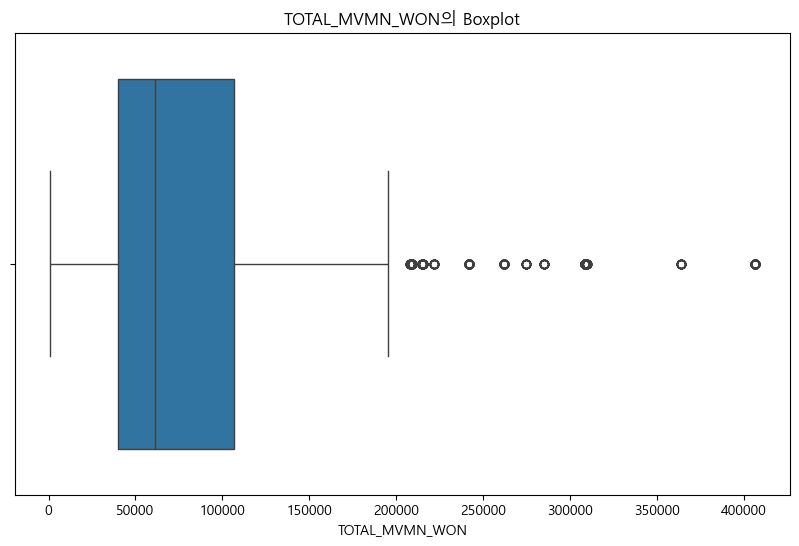

In [107]:
# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_MVMN_WON')
plt.title('TOTAL_MVMN_WON의 Boxplot')
plt.xlabel('TOTAL_MVMN_WON')
plt.show()

> BOXPLOT의 이상치 기준인 1.5IQR을 넘어서는 수치는 많지만, 해당 수치들은 대부분 모여 있으며 분석에 필요한 데이터들이므로, 400000 이상의 데이터만 제거하기로 결정함

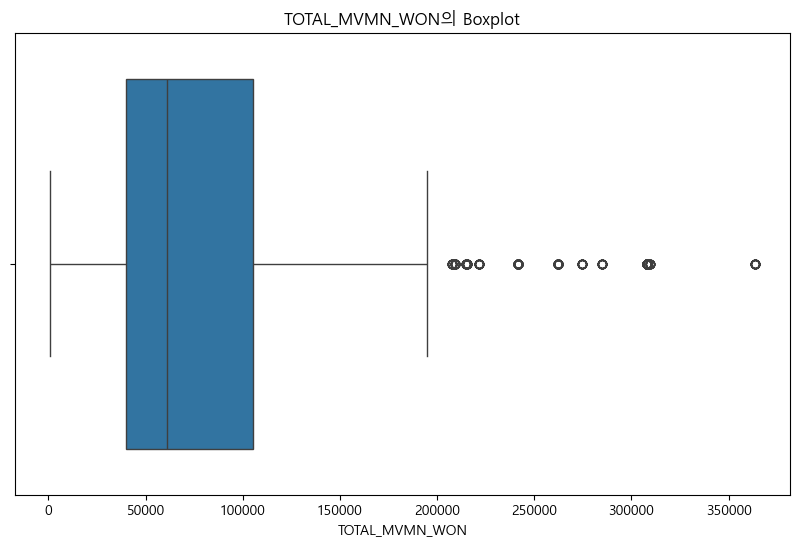

In [108]:
# 'TOTAL_MVMN_WON' 400000 이상의 값 제거
travel_log = travel_log[travel_log['TOTAL_MVMN_WON'] < 400000]

# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_MVMN_WON')
plt.title('TOTAL_MVMN_WON의 Boxplot')
plt.xlabel('TOTAL_MVMN_WON')
plt.show()


<2> TOTAL_ACTIVITY_WON

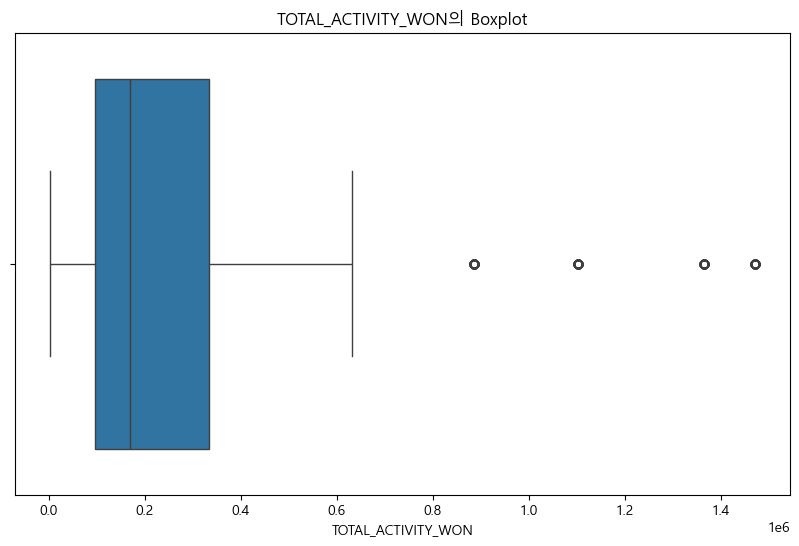

In [109]:
# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_ACTIVITY_WON')
plt.title('TOTAL_ACTIVITY_WON의 Boxplot')
plt.xlabel('TOTAL_ACTIVITY_WON')
plt.show()

> BOXPLOT의 이상치 기준인 1.5IQR을 넘어서는 수치는 많지만, 해당 수치들은 대부분 모여 있으며 분석에 필요한 데이터들이므로, 현재 x축 단위인 1e6 기준으로 1.0 이상의 데이터만 제거하기로 결정함

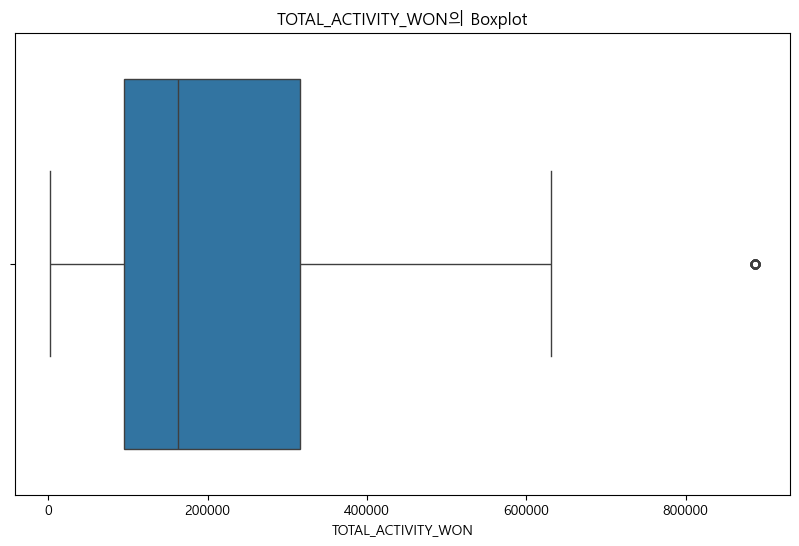

In [110]:
# 1 이상인 값을 제거
travel_log = travel_log[travel_log['TOTAL_ACTIVITY_WON'] < 1000000]

# Boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=travel_log, x='TOTAL_ACTIVITY_WON')
plt.title('TOTAL_ACTIVITY_WON의 Boxplot')
plt.xlabel('TOTAL_ACTIVITY_WON')
plt.show()


2. 결측치 처리 - 동반자정보 관련 변수인 REL_CD, COMPANION_GENDER, COMPANION_AGE_GRP 발생 이유 분석 위해 '나홀로 여행'인지 검증

In [111]:
# REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'인 데이터 필터링
missing_rel_cd_and_solotravel = travel_log[(travel_log['REL_CD'].isnull()) & (travel_log['TRAVEL_STATUS_ACCOMPANY'] == '나홀로 여행')]

# 해당 데이터의 개수
count = missing_rel_cd_and_solotravel.shape[0]

print(f"REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'인 데이터의 개수: {count}")

REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'인 데이터의 개수: 660


In [112]:
# REL_CD가 결측치이고, TRAVEL_STATUS_ACCOMPANY가 '나홀로 여행'이 아닌 데이터 필터링
filtered_data = travel_log[travel_log['REL_CD'].isnull() & (travel_log['TRAVEL_STATUS_ACCOMPANY'] != '나홀로 여행')]

# 결과 출력
print(filtered_data)

Empty DataFrame
Columns: [GENDER, AGE_GRP, JOB_NM, TRAVEL_TERM, TRAVEL_LIKE_SGG_1, TRAVEL_LIKE_SGG_2, TRAVEL_LIKE_SGG_3, TRAVEL_STYL_1, TRAVEL_STYL_2, TRAVEL_STYL_3, TRAVEL_STYL_4, TRAVEL_STYL_5, TRAVEL_STYL_6, TRAVEL_STYL_7, TRAVEL_STYL_8, TRAVEL_STATUS_RESIDENCE, TRAVEL_STATUS_DESTINATION, TRAVEL_STATUS_ACCOMPANY, TRAVEL_MOTIVE, TRAVEL_COMPANIONS_NUM, TRAVEL_ID, REL_CD, COMPANION_GENDER, COMPANION_AGE_GRP, TRAVEL_PURPOSE, TRAVEL_START_YMD, TRAVEL_END_YMD, TRAVEL_MISSION_CHECK, TOTAL_MVMN_WON, ACTIVITY_TYPE_CD, TOTAL_ACTIVITY_WON]
Index: []


In [113]:
# '나홀로 여행'인 경우 동반자 정보 결측치를 처리
travel_log.loc[
    (travel_log['REL_CD'].isnull()) & (travel_log['TRAVEL_STATUS_ACCOMPANY'] == '나홀로 여행'), 
    ['REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP']
] = ['없음', '없음', '없음']

# '나홀로 여행'이 아닌 경우 해당 행 삭제
travel_log = travel_log.drop(
    travel_log[(travel_log['REL_CD'].isnull()) & (travel_log['TRAVEL_STATUS_ACCOMPANY'] != '나홀로 여행')].index
)

# 결과 확인
null_status = travel_log[['REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP']].isnull().sum()
print(null_status)

REL_CD               0
COMPANION_GENDER     0
COMPANION_AGE_GRP    0
dtype: int64


C:\Users\kimbomi\AppData\Local\Temp\ipykernel_9844\1883630689.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '없음' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  travel_log.loc[


3. 결측치 처리 - MAJOR_TRANSPORT의 결측치는 없음으로, TOTAL_MVMN_WON의 결측치는 현재 TOTAL_MVMN_WON의 평균값으로 대체

In [114]:
# # MAJOR_TRANSPORT 결측치 처리
# travel_log['MAJOR_TRANSPORT'].fillna('없음', inplace=True)

# TOTAL_MVMN_WON 결측치 처리
mean_total_mvmn_won = travel_log['TOTAL_MVMN_WON'].mean()
travel_log['TOTAL_MVMN_WON'].fillna(mean_total_mvmn_won, inplace=True)

# 결측치 처리 후 데이터 상태 확인
null_status = travel_log[[ 'TOTAL_MVMN_WON']].isnull().sum()
print(null_status)

TOTAL_MVMN_WON    0
dtype: int64


4. 결측치 처리 - TOTAL_ACTIVITY_WON의 결측치를 현재 TOTAL_ACTIVITY_WON의 평균값으로 대체

In [115]:
# TOTAL_ACTIVITY_WON 결측치의 평균값 계산
mean_total_activity_won = travel_log['TOTAL_ACTIVITY_WON'].mean()

# 결측치를 평균값으로 대체
travel_log['TOTAL_ACTIVITY_WON'].fillna(mean_total_activity_won, inplace=True)

# 결측치 처리 후 데이터 상태 확인
null_status_activity = travel_log['TOTAL_ACTIVITY_WON'].isnull().sum()
print(null_status_activity)

0


5. 이후 추가 분석시 사용하기 위해 이동수단총소비액과 활동총소비액을 합친 총소비액 파생변수 추가

In [116]:
# TOTAL_WON 파생변수 추가
travel_log['TOTAL_WON'] = travel_log['TOTAL_MVMN_WON'] + travel_log['TOTAL_ACTIVITY_WON']

# 결과 확인
print(travel_log[['TOTAL_MVMN_WON', 'TOTAL_ACTIVITY_WON', 'TOTAL_WON']].head())

   TOTAL_MVMN_WON  TOTAL_ACTIVITY_WON  TOTAL_WON
0      119,000.00          336,010.00 455,010.00
1      119,000.00          336,010.00 455,010.00
2      119,000.00          336,010.00 455,010.00
3      119,000.00          336,010.00 455,010.00
4      119,000.00          336,010.00 455,010.00


6. 이후 추가 분석시 사용하기 위해 여행 기간 파생변수 추가

In [117]:
# 날짜 변환
travel_log['TRAVEL_START_YMD'] = pd.to_datetime(travel_log['TRAVEL_START_YMD'])
travel_log['TRAVEL_END_YMD'] = pd.to_datetime(travel_log['TRAVEL_END_YMD'])

# 여행 기간 계산
travel_log['TRAVEL_DURATION'] = (travel_log['TRAVEL_END_YMD'] - travel_log['TRAVEL_START_YMD']).dt.days

# 결과 확인
print(travel_log[['TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'TRAVEL_DURATION']].head(50))

   TRAVEL_START_YMD TRAVEL_END_YMD  TRAVEL_DURATION
0        2023-08-12     2023-08-15                3
1        2023-08-12     2023-08-15                3
2        2023-08-12     2023-08-15                3
3        2023-08-12     2023-08-15                3
4        2023-08-12     2023-08-15                3
5        2023-08-12     2023-08-15                3
6        2023-08-12     2023-08-15                3
7        2023-08-12     2023-08-15                3
8        2023-08-12     2023-08-15                3
9        2023-08-12     2023-08-15                3
10       2023-08-12     2023-08-15                3
11       2023-08-12     2023-08-15                3
12       2023-08-12     2023-08-15                3
13       2023-08-12     2023-08-15                3
14       2023-08-12     2023-08-15                3
15       2023-08-12     2023-08-15                3
16       2023-08-12     2023-08-15                3
17       2023-08-12     2023-08-15                3
18       202

7. 이후 추가 분석시 사용하기 위해 여행 계절 파생변수 추가

In [118]:
# 계절별 분류 함수 정의
def categorize_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# 'TRAVEL_START_YMD'에서 월을 추출하여 계절 분류
travel_log['SEASON'] = travel_log['TRAVEL_START_YMD'].dt.month.apply(categorize_season)

# 결과 확인
print(travel_log[['TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'TRAVEL_DURATION', 'SEASON']].head(50))

   TRAVEL_START_YMD TRAVEL_END_YMD  TRAVEL_DURATION  SEASON
0        2023-08-12     2023-08-15                3  Summer
1        2023-08-12     2023-08-15                3  Summer
2        2023-08-12     2023-08-15                3  Summer
3        2023-08-12     2023-08-15                3  Summer
4        2023-08-12     2023-08-15                3  Summer
5        2023-08-12     2023-08-15                3  Summer
6        2023-08-12     2023-08-15                3  Summer
7        2023-08-12     2023-08-15                3  Summer
8        2023-08-12     2023-08-15                3  Summer
9        2023-08-12     2023-08-15                3  Summer
10       2023-08-12     2023-08-15                3  Summer
11       2023-08-12     2023-08-15                3  Summer
12       2023-08-12     2023-08-15                3  Summer
13       2023-08-12     2023-08-15                3  Summer
14       2023-08-12     2023-08-15                3  Summer
15       2023-08-12     2023-08-15      

<h3>3. 전처리 후 확인</h3>

In [119]:
# 데이터의 행, 열 개수 출력
print('merge 데이터의 행, 열 개수 : ')
print(travel_log.shape)

merge 데이터의 행, 열 개수 : 
(5827, 34)


In [120]:
# 데이터의 구조와 타입 확인
print('merge 데이터의 구조와 타입 : ')
print(travel_log.info())

merge 데이터의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
Index: 5827 entries, 0 to 6427
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   GENDER                     5827 non-null   object        
 1   AGE_GRP                    5827 non-null   int64         
 2   JOB_NM                     5827 non-null   int64         
 3   TRAVEL_TERM                5827 non-null   int64         
 4   TRAVEL_LIKE_SGG_1          5827 non-null   int64         
 5   TRAVEL_LIKE_SGG_2          5827 non-null   int64         
 6   TRAVEL_LIKE_SGG_3          5827 non-null   int64         
 7   TRAVEL_STYL_1              5827 non-null   int64         
 8   TRAVEL_STYL_2              5827 non-null   int64         
 9   TRAVEL_STYL_3              5827 non-null   int64         
 10  TRAVEL_STYL_4              5827 non-null   int64         
 11  TRAVEL_STYL_5              5827 non-null   int64     

In [121]:
# 데이터의 결측치 확인
print('merge 데이터.csv의 결측치 : ')
print(travel_log.isnull().sum())

merge 데이터.csv의 결측치 : 
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
REL_CD                       0
COMPANION_GENDER             0
COMPANION_AGE_GRP            0
TRAVEL_PURPOSE               0
TRAVEL_START_YMD             0
TRAVEL_END_YMD               0
TRAVEL_MISSION_CHECK         0
TOTAL_MVMN_WON               0
ACTIVITY_TYPE_CD             0
TOTAL_ACTIVITY_WON           0
TOTAL_WON        

In [122]:
print(travel_log)

     GENDER  AGE_GRP  JOB_NM  TRAVEL_TERM  TRAVEL_LIKE_SGG_1  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SGG_3  TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_STYL_3  TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  TRAVEL_STYL_7  TRAVEL_STYL_8 TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY  TRAVEL_MOTIVE  TRAVEL_COMPANIONS_NUM  TRAVEL_ID REL_CD COMPANION_GENDER COMPANION_AGE_GRP TRAVEL_PURPOSE TRAVEL_START_YMD TRAVEL_END_YMD TRAVEL_MISSION_CHECK  TOTAL_MVMN_WON  ACTIVITY_TYPE_CD  TOTAL_ACTIVITY_WON  TOTAL_WON  TRAVEL_DURATION  SEASON
0         남       30       5            2              42210              44825              41270              1              1              2              1              1              7              7              7                     경기도                        충남                자녀 동반 여행              2                      4  g_g005903   1.00             2.00              4.00      1;22;26;5       2023-08-12     2023-08-15              5;22;11      1

In [123]:
travel_log.to_csv('data/validation/merged_data/no_map_merge_validation.csv',index=False)